In [1]:
# Import required modules and packages
# Data handling
import pandas as pd
import numpy as np
import random
from pandas.core.algorithms import mode

# Webscrapping
from bs4 import BeautifulSoup
import requests
import json

# Data visualizations
import matplotlib as mpl
import matplotlib.pyplot as plt # matplotlib 3.4 above is needed
from matplotlib import font_manager
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


In [2]:
# Scrape game shots from a single game from understat.com
# matchID: 16643
base_url = 'https://understat.com/match/'
match = str(input("Please enter a match ID: ")) # Enter match ID from understat.com
url = base_url + match

In [3]:
# Scraping all the scripts in the webpage
req = requests.get(url)
soup = BeautifulSoup(req.content,'lxml')
scripts = soup.find_all('script')

In [4]:
# Retrieve only shot data script
strings = scripts[1].string

In [5]:
# Strip data into correct json format
ind_start = strings.index("('")+2
ind_end = strings.index("')")

json_data = strings[ind_start:ind_end]

# Encode data
json_data = json_data.encode('utf8').decode('unicode_escape')

# Convert string to json format
data = json.loads(json_data)

In [6]:
x = []
y = []
xG = []
team = []
result = []
player = []
data_away = data['a']
data_home = data['h']

# Loop through each line in home team dictionary and add to list
for index in range(len(data_home)):
    for key in data_home[index]:
        if key == 'X':
            x.append(data_home[index][key])
        if key == 'Y':
            y.append(data_home[index][key])
        if key == 'xG':
            xG.append(data_home[index][key])
        if key == 'h_team':
            team.append(data_home[index][key])
        if key == 'result':
            result.append(data_home[index][key])
        if key == 'player':
            player.append(data_home[index][key])

# Loop through each line in away team dictionary and add to list
for index in range(len(data_away)):
    for key in data_away[index]:
        if key == 'X':
            x.append(data_away[index][key])
        if key == 'Y':
            y.append(data_away[index][key])
        if key == 'xG':
            xG.append(data_away[index][key])
        if key == 'a_team':
            team.append(data_away[index][key])
        if key == 'result':
            result.append(data_away[index][key])
        if key == 'player':
            player.append(data_away[index][key])

In [7]:
# Create dataframe
col_names = ['team','player','x','y','xG','result']
shots = pd.DataFrame([team,player,x,y,xG,result],index=col_names)
shots = shots.T

In [8]:
# Convert numerical string to float
shots['x'] = pd.to_numeric(shots['x'])
shots['y'] = pd.to_numeric(shots['y'])
shots['xG'] = pd.to_numeric(shots['xG'])

shots['x'] = shots['x']*100
shots['y'] = shots['y']*100

shots

,team,player,x,y,xG,result
0,Manchester United,Cristiano Ronaldo,88.699997,42.700001,0.073877,ShotOnPost
1,Manchester United,Bruno Fernandes,82.900002,53.099998,0.039885,BlockedShot
2,Manchester United,Anthony Elanga,90.800003,35.200001,0.040928,MissedShots
3,Manchester United,Bruno Fernandes,88.400002,55.500000,0.453116,SavedShot
4,Manchester United,Bruno Fernandes,92.000000,50.400002,0.392226,MissedShots
5,Manchester United,Bruno Fernandes,91.300003,56.299999,0.043056,MissedShots
6,Manchester United,Anthony Elanga,91.099998,53.299999,0.093428,MissedShots
7,Manchester United,Victor Lindelöf,90.900002,40.099998,0.076830,BlockedShot
8,Manchester United,Fred,73.199997,38.000000,0.014718,MissedShots
9,Manchester United,Alex Telles,74.599998,34.099998,0.047630,MissedShots


In [9]:
# Assign home and away team
home_team = shots.iloc[0]['team']
away_team = shots.iloc[-1]['team']
print("Home Team: " + home_team)
print("Away Team: " + away_team)

Home Team: Manchester United
Away Team: Watford


In [10]:
# IDEA
# Goal Probability Distribution
# home_goal1 ~ home_goal10 = (how many times?) -> Calculate probability afterwards
# same for away 

# Scoreline probability
# scorelines = [home_goals, away_goals] -> Put all possible scorelines generated into a list(1000 sims, 1000 scorelines) -> Calculate probability of each scoreline
# list of lists maybe? 

In [11]:
# Retrieve xG values of all home & away shots in a list
home_shots_xG = []
away_shots_xG = []

home_shots = shots.loc[shots['team'] == home_team]
away_shots = shots.loc[shots['team'] == away_team]

for i in range(len(home_shots)):
  current_xG = home_shots.iloc[i]['xG']
  home_shots_xG.append(current_xG)

for i in range(len(away_shots)):
  current_xG = away_shots.iloc[i]['xG']
  away_shots_xG.append(current_xG)

In [12]:
# Match Simulation using xG
# If more shots are taken, more xG are being simulated, there is a higher chance that a goal will be simulated with xG being the weightage

# Number of simulations
n = 10000

# Initialize outcome counters
home_wins = 0
draws = 0
away_wins = 0
scorelines = []

# Simulation
for i in range(n):
  home_goals = 0
  away_goals = 0
  for j in range(len(home_shots_xG)):
    x = random.random()
    if x < home_shots_xG[j]:
      home_goals += 1
  for k in range(len(away_shots_xG)):
    y = random.random()
    if y < away_shots_xG[k]:
      away_goals += 1

  # Store scorelines
  scoreline = [home_goals, away_goals]
  scorelines.append(scoreline)
  
  # Determine Outcome
  if home_goals > away_goals:
    home_wins += 1
  if away_goals > home_goals:
    away_wins += 1
  elif home_goals == away_goals:
    draws += 1



In [13]:
# Simulation outcome
results = pd.DataFrame({'Wins': [home_wins, away_wins],
                        'Draws': [draws, draws],
                        'Losses': [away_wins, home_wins]},
                       index = [home_team, away_team])

# Calculate outcome probability
home_win_prob = round(home_wins/n * 100, 2)
draw_prob = round(draws/n * 100, 2)
away_win_prob = round(away_wins/n * 100, 2)
print(f"\nHome Win Probability: {home_win_prob:.2f}%")
print(f"\nDraw Probability: {draw_prob:.2f}%")
print(f"\nAway Win Probability: {away_win_prob:.2f}%")

# Store goal distribution into data frame
goal_dist_df = pd.DataFrame(scorelines, columns= [home_team, away_team])

# Find most probable scoreline
mode_scoreline = mode(scorelines)

print("\n")
print(results)
print("\nMost probable scoreline: {} - {}" .format(mode_scoreline[0][0], mode_scoreline[0][1]))


Home Win Probability: 85.40%

Draw Probability: 11.23%

Away Win Probability: 3.37%


                   Wins  Draws  Losses
Manchester United  8540   1123     337
Watford             337   1123    8540

Most probable scoreline: 2 - 0


#### Visualizations

In [14]:
# Outcome Probability
rp_data = [home_wins, draws, away_wins]
labels = [home_team, 'Draw', away_team]
colors = ['red', 'grey', 'blue']

fig = go.Figure(data=[go.Pie(labels=labels, values=rp_data, textinfo='percent',
                             #insidetextorientation='radial',
                             marker_colors = colors
                            )])

fig.update_layout(title_text="Match Outcome Porbability")
fig.show()

Text(0.39, 0.89, 'Most probable scoreline: 2 - 0')

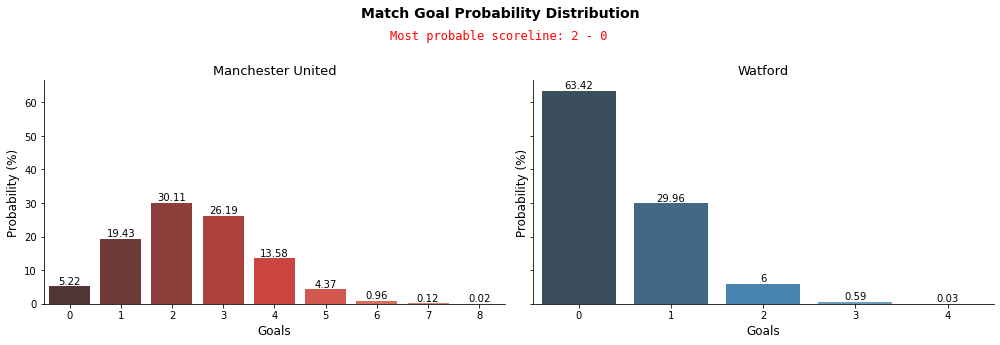

In [15]:
# matplotlib 3.4 above is needed
# Home Team Goal Probability Distribution
home_gpd_df = goal_dist_df.iloc[:,0]
home_gpd = home_gpd_df.value_counts().rename_axis('Goals').reset_index(name='Frequency')
home_gpd = home_gpd.sort_values('Goals')

home_gpd['Probability'] = home_gpd['Frequency'] / n * 100

# Away Team Goal Probability Distribution
away_gpd_df = goal_dist_df.iloc[:,1]
away_gpd = away_gpd_df.value_counts().rename_axis('Goals').reset_index(name='Frequency')
away_gpd = away_gpd.sort_values('Goals')

away_gpd['Probability'] = away_gpd['Frequency'] / n * 100

# Visualizations Plots
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(14,5))

#Home plots
data1 = home_gpd.groupby("Probability").size()

pal1 = sns.color_palette("Reds_d", len(data1))
rank1 = data1.argsort().argsort()
sns.barplot(x="Goals", y="Probability", data=home_gpd, palette=np.array(pal1[::-1])[rank1], ax=ax1)
ax1.set_xlabel("Goals", size = 12)
ax1.set_ylabel("Probability (%)", size = 12)
ax1.bar_label(ax1.containers[0])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax1.set_title(home_team, size=13)

# Away plots
data2 = away_gpd.groupby("Probability").size()

pal2 = sns.color_palette("Blues_d", len(data2))
rank2 = data2.argsort().argsort()
sns.barplot(x="Goals", y="Probability", data=away_gpd, palette=np.array(pal2[::-1])[rank2], ax=ax2)

ax2.set_xlabel("Goals", size = 12)
ax2.set_ylabel("Probability (%)", size = 12)
ax2.bar_label(ax2.containers[0])
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

ax2.set_title(away_team, size= 13)

fig.tight_layout(rect=[0, 0.03, 1, 0.85])
fig.suptitle("Match Goal Probability Distribution\n", fontweight ="bold", size=14)
fig.text(0.39, 0.89, "Most probable scoreline: {} - {}" .format(mode_scoreline[0][0], mode_scoreline[0][1]), color = 'r', family = 'monospace', size=12)